# **Financial Sentiment Analysis using Machine Learning Approaches**

## **Importing Libraries**

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## **Loding Dataset**

In [150]:
df=pd.read_csv("/content/Fin-Sntmt-Anls Data.csv",encoding='latin-1')

In [151]:
df

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
2,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
3,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .
4841,neutral,"Rinkuskiai 's beer sales fell by 6.5 per cent to 4.16 million litres , while Kauno Alus ' beer sales jumped by 6.9 per cent to 2.48 million litres ."
4842,negative,"Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn ."
4843,negative,"Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn ."


**Neutral Words:**

These words typically convey factual information or indicate a lack of strong sentiment. They often relate to reporting, announcements, or routine business activities.

EX:reporting,announced,plans,proposed,scheduled,estimated,forecast,projected,expected,results.

**Positive Words:**

These words convey optimism, confidence, or favorable outcomes. They may indicate growth, profitability, or positive market sentiment.

EX:increase,growth,successful,profit,gain,improve,strong,confident,well-received,opportunity.



**Negative Words:**

These words convey pessimism, uncertainty, or unfavorable outcomes. They may indicate decline, loss, or negative market sentiment.

EX:decline,loss,layoff,decrease,weak,uncertain,risk,concern,drop,failure.


## **Changing the Header of Dataset**

In [152]:
df=df.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'Message'})

In [153]:
df.shape

(4845, 2)

## **Understanding Dataset**

In [154]:
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [155]:
df.sample(5)

,sentiment,Message
1579,neutral,Pharmaceuticals - Netherlands This brand-new market analysis gives a clear overview of the actual situation and future outlook of the pharmaceutical market in Netherlands .
1363,neutral,The company is presently examining whether the project would be financially feasible .
715,positive,"Earnings per share ( EPS ) were EUR0 .03 , up from the loss of EUR0 .083 ."
2979,neutral,"It is Estonia 's second-largest meat processing company by market share ( according to AC Nielsen 's 2008 data , 13 percent ) ."
2605,neutral,The company then said it will focus its resources on clinical research .


In [156]:
df['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

### **Observation:**
1. The Dataset contains 2 features Sentiment and Text and a total of 4845 rows of data
2. The Text column contains the actual text content that is being analyzed for sentiment.
3. Based on the type of Text the Sentiment is classified into 3 Categories – Positive, Neutral, and Negative

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4845 non-null   object
 1   Message    4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [158]:
df.shape

(4845, 2)

In [159]:
df.describe()

,sentiment,Message
count,4845,4845
unique,3,4837
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sells stake in Morning Digital Design Oy Finnish IT company TJ Group Plc said on Friday 7 April that it had signed an agreement on selling its shares of Morning Digital Design Oy to Edita Oyj .
freq,2878,2


In [160]:
df.isnull().sum()

,0
sentiment,0
Message,0


In [161]:
df.duplicated().sum()

6

> ### The dataset has 0 Null values but 6 Duplicate values

In [162]:
df.drop_duplicates(inplace=True)

In [163]:
df.shape

(4839, 2)

In [164]:
df.index = range(len(df))
df['Message'].apply(lambda x: len(x.split(' '))).sum()

111786

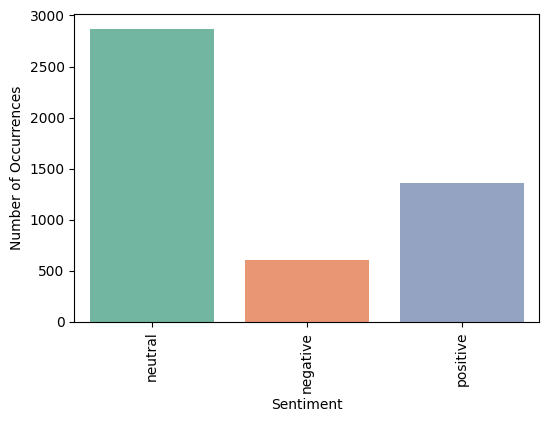

In [165]:
plt.figure(figsize=(6,4))
sns.countplot(x="sentiment",data=df,palette='Set2')
plt.ylabel('Number of Occurrences')
plt.xlabel('Sentiment')
plt.xticks(rotation=90)
plt.show()


In [166]:
'''sentiment  = {'positive': 0,'neutral': 1,'negative':2}

df.sentiment = [sentiment[item] for item in df.sentiment]
print(df)'''

"sentiment  = {'positive': 0,'neutral': 1,'negative':2}\n\ndf.sentiment = [sentiment[item] for item in df.sentiment]\nprint(df)"

In [167]:
'''def print_message(index):
    example = df[df.index == index][['Message', 'sentiment']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Message:', example[1])
print_message(12)'''

"def print_message(index):\n    example = df[df.index == index][['Message', 'sentiment']].values[0]\n    if len(example) > 0:\n        print(example[0])\n        print('Message:', example[1])\nprint_message(12)"

In [168]:
'''# Print first message
print_message(0)'''

'# Print first message\nprint_message(0)'

# **Data Cleaning**

## **1. Removing unnecessary/special characters**
Clean the text by removing special characters, punctuation, and numbers

In [169]:
import re

def remove_unnecessary_characters(text):
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)            # Removes anything that is not a letter or whitespace
    return cleaned_text

df['cleaned_text'] = df['Message'].apply(remove_unnecessary_characters)

In [170]:
df.head(2)

,sentiment,Message,cleaned_text
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .",Technopolis plans to develop in stages an area of no less than square meters in order to host companies working in computer technologies and telecommunications the statement said
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .",The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility contrary to earlier layoffs the company contracted the ranks of its office workers the daily Postimees reported


## **2. Lowercasing each character in the text**
Convert all text to lowercase to ensure consistency

In [171]:
def to_lowercase(text):
    return text.lower()
df['cleaned_text'] = df['cleaned_text'].apply(to_lowercase)
df.head()

,sentiment,Message,cleaned_text
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .",technopolis plans to develop in stages an area of no less than square meters in order to host companies working in computer technologies and telecommunications the statement said
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .",the international electronic industry company elcoteq has laid off tens of employees from its tallinn facility contrary to earlier layoffs the company contracted the ranks of its office workers the daily postimees reported
2,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .,with the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability
3,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .",according to the company s updated strategy for the years basware targets a longterm net sales growth in the range of with an operating profit margin of of net sales
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .,financing of aspocomp s growth aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding hdi printed circuit boards pcbs


## **3. Tokenization**
Split sentences into individual words (tokens)

In [172]:
def tokenize(text):
    return text.split()  # Split by space to get individual words

df['tokens'] = df['cleaned_text'].apply(tokenize)
df.head(2)

,sentiment,Message,cleaned_text,tokens
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .",technopolis plans to develop in stages an area of no less than square meters in order to host companies working in computer technologies and telecommunications the statement said,"[technopolis, plans, to, develop, in, stages, an, area, of, no, less, than, square, meters, in, order, to, host, companies, working, in, computer, technologies, and, telecommunications, the, statement, said]"
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .",the international electronic industry company elcoteq has laid off tens of employees from its tallinn facility contrary to earlier layoffs the company contracted the ranks of its office workers the daily postimees reported,"[the, international, electronic, industry, company, elcoteq, has, laid, off, tens, of, employees, from, its, tallinn, facility, contrary, to, earlier, layoffs, the, company, contracted, the, ranks, of, its, office, workers, the, daily, postimees, reported]"


In [173]:
dfs = df.copy()
dfs.head(2)

,sentiment,Message,cleaned_text,tokens
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .",technopolis plans to develop in stages an area of no less than square meters in order to host companies working in computer technologies and telecommunications the statement said,"[technopolis, plans, to, develop, in, stages, an, area, of, no, less, than, square, meters, in, order, to, host, companies, working, in, computer, technologies, and, telecommunications, the, statement, said]"
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .",the international electronic industry company elcoteq has laid off tens of employees from its tallinn facility contrary to earlier layoffs the company contracted the ranks of its office workers the daily postimees reported,"[the, international, electronic, industry, company, elcoteq, has, laid, off, tens, of, employees, from, its, tallinn, facility, contrary, to, earlier, layoffs, the, company, contracted, the, ranks, of, its, office, workers, the, daily, postimees, reported]"


## **4. Removing Stopwords**
Remove common stopwords like "and", "the" etc. to focus on meaningful words.

In [174]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [175]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['tokens'] = df['tokens'].apply(remove_stopwords)
df.head(2)

,sentiment,Message,cleaned_text,tokens
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .",technopolis plans to develop in stages an area of no less than square meters in order to host companies working in computer technologies and telecommunications the statement said,"[technopolis, plans, develop, stages, area, less, square, meters, order, host, companies, working, computer, technologies, telecommunications, statement, said]"
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .",the international electronic industry company elcoteq has laid off tens of employees from its tallinn facility contrary to earlier layoffs the company contracted the ranks of its office workers the daily postimees reported,"[international, electronic, industry, company, elcoteq, laid, tens, employees, tallinn, facility, contrary, earlier, layoffs, company, contracted, ranks, office, workers, daily, postimees, reported]"


## **5. Lemmatization**
Convert words to their lemma or dictionary base forms.

In [176]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [177]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['tokens'] = df['tokens'].apply(lemmatize)
df.head(2)

,sentiment,Message,cleaned_text,tokens
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .",technopolis plans to develop in stages an area of no less than square meters in order to host companies working in computer technologies and telecommunications the statement said,"[technopolis, plan, develop, stage, area, le, square, meter, order, host, company, working, computer, technology, telecommunication, statement, said]"
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .",the international electronic industry company elcoteq has laid off tens of employees from its tallinn facility contrary to earlier layoffs the company contracted the ranks of its office workers the daily postimees reported,"[international, electronic, industry, company, elcoteq, laid, ten, employee, tallinn, facility, contrary, earlier, layoff, company, contracted, rank, office, worker, daily, postimees, reported]"


## **7. Handling Null Values (If Any)**

In [178]:
df.isnull().sum()

,0
sentiment,0
Message,0
cleaned_text,0
tokens,0


No Null Values after cleaning

# **Data Visualization**

## **1. Word Cloud**
Visualize the most frequent words in positive, neutral, and negative sentiment categories

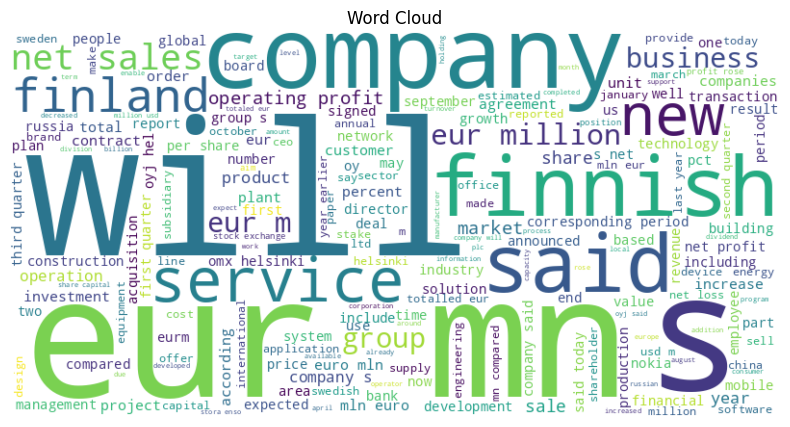

In [179]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(df):
    # Generate text for the word cloud from the 'cleaned_text' column
    all_text = ' '.join(df['cleaned_text'])

    # Create the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud')
    plt.show()

generate_wordcloud(df)

### **Sentiment Classification:**
In our analysis of the dataset, we understood that sentiment is classified into three main categories based on the presence of specific words and phrases in the text:
1. Positive :
The text containing words such as “increase”, “growth”, “successful” and "well-received” etc.… are classified as positive. These words indicate favorable outcomes.

2. Neutral :
The text containing words such as “planning”, "proposed" and "reported” etc.… are classified as neutral. These words don’t indicate favorable/unfavorable outcomes strongly.

3. Negative :
The text containing words such as “decline“, "loss“, "layoff“ and "decrease” etc.… are classified as negative. These words indicate unfavorable outcomes.

In [ ]:
def generate_wordcloud_comparison(dfs, df, sentiment):
    # Generate text for the word cloud from both before (dfs) and after (df) removing stopwords
    sentiment_text_before = ' '.join(dfs[dfs['sentiment'] == sentiment]['message'])
    sentiment_text_after = ' '.join([' '.join(x) if isinstance(x, list) else x for x in df[df['sentiment'] == sentiment]['review_message']])


    # Create word clouds
    wordcloud_before = WordCloud(width=800, height=400, background_color='black').generate(sentiment_text_before)
    wordcloud_after = WordCloud(width=800, height=400, background_color='black').generate(sentiment_text_after)

    # Plot the word clouds side by side
    plt.figure(figsize=(20,10))

    # Word cloud before stopword removal
    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud_before, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment (Before Stopwords Removal)')

    # Word cloud after stopword removal
    plt.subplot(1, 2, 2)
    plt.imshow(wordcloud_after, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment (After Stopwords Removal)')

    plt.show()

In [180]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

def plot_word_frequency(df, num_words=50):
    # Get tokens from the entire DataFrame
    all_tokens = df['tokens']
    all_words = [word for tokens in all_tokens for word in tokens]  # Flatten the list
    word_counts = Counter(all_words)
    common_words = word_counts.most_common(num_words)

    # Separate words and counts for plotting
    words, counts = zip(*common_words)

    # Plot word frequencies
    plt.figure(figsize=(10, 8))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(f'Top {num_words} Most Frequent Words in Entire Dataset')
    plt.xlabel('Frequency')
    plt.ylabel('Words')

    plt.tight_layout()
    plt.show()

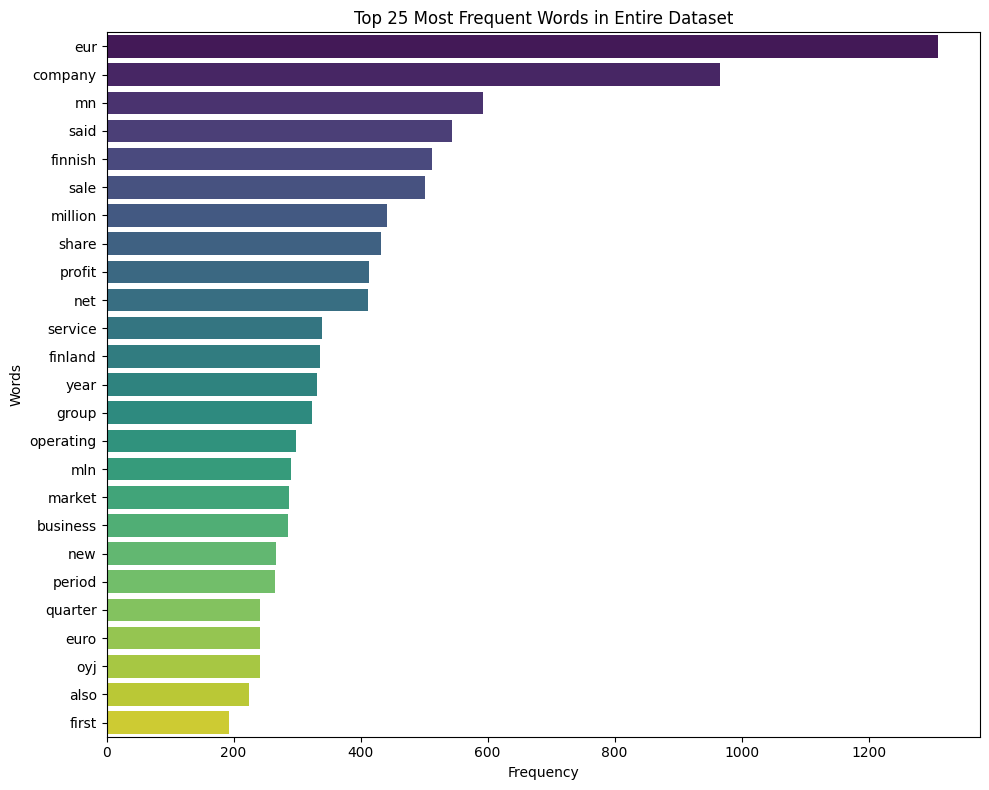

In [181]:
plot_word_frequency(df,25)

In [182]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

def plot_word_frequency_by_sentiment(df, sentiment, num_words=50):
    # Filter tokens based on the given sentiment
    sentiment_tokens = df[df['sentiment'] == sentiment]['tokens']

    # Flatten the list of tokens
    all_words = [word for tokens in sentiment_tokens for word in tokens]

    # Count word frequencies
    word_counts = Counter(all_words)
    common_words = word_counts.most_common(num_words)

    # Separate words and counts for plotting
    words, counts = zip(*common_words)

    # Plot word frequencies
    plt.figure(figsize=(10, 8))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(f'Top {num_words} Most Frequent Words for {sentiment.capitalize()} Sentiment')
    plt.xlabel('Frequency')
    plt.ylabel('Words')

    plt.tight_layout()
    plt.show()

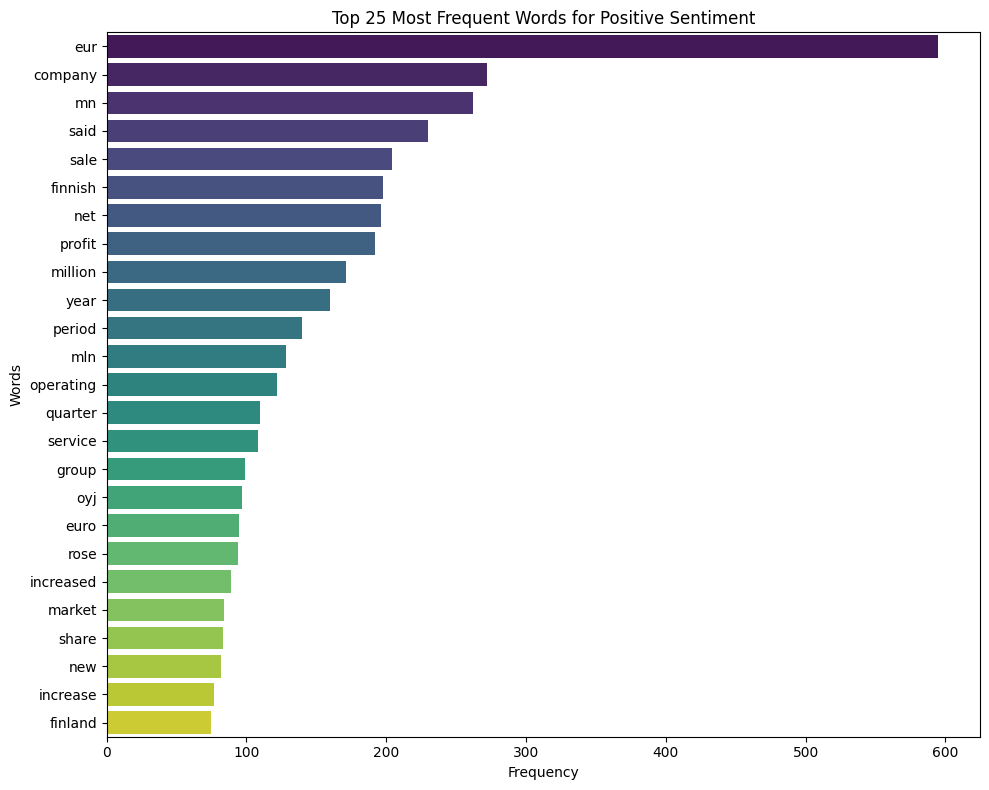

In [183]:
plot_word_frequency_by_sentiment(df, 'positive', 25)

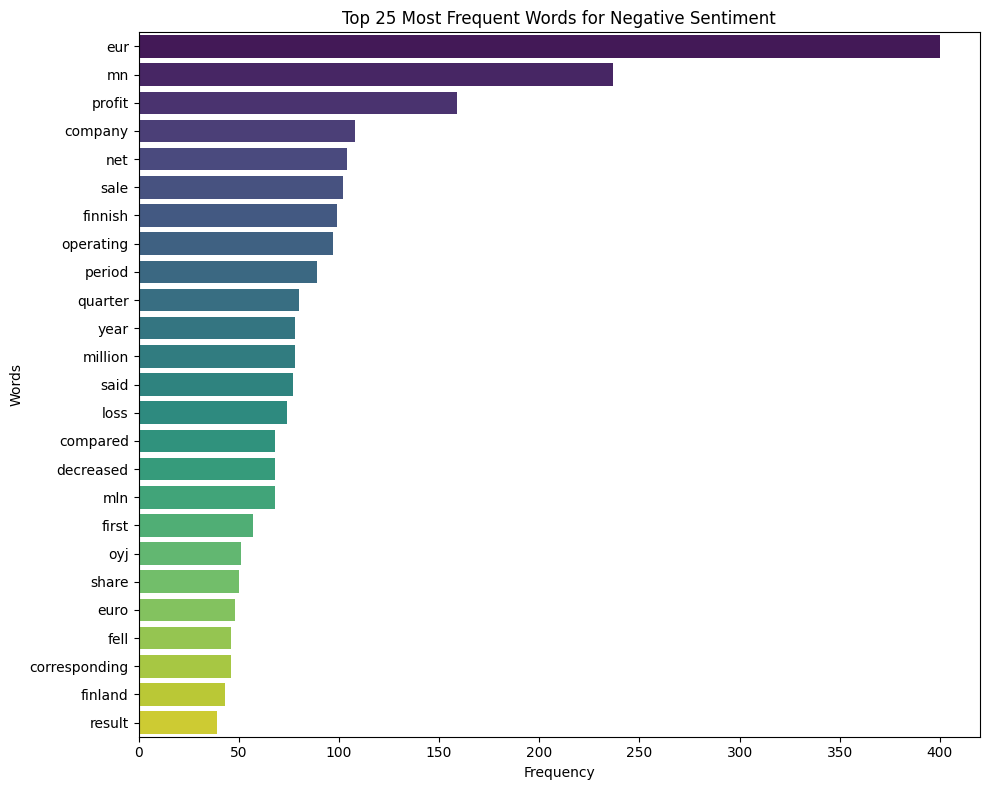

In [184]:
plot_word_frequency_by_sentiment(df, 'negative', 25)

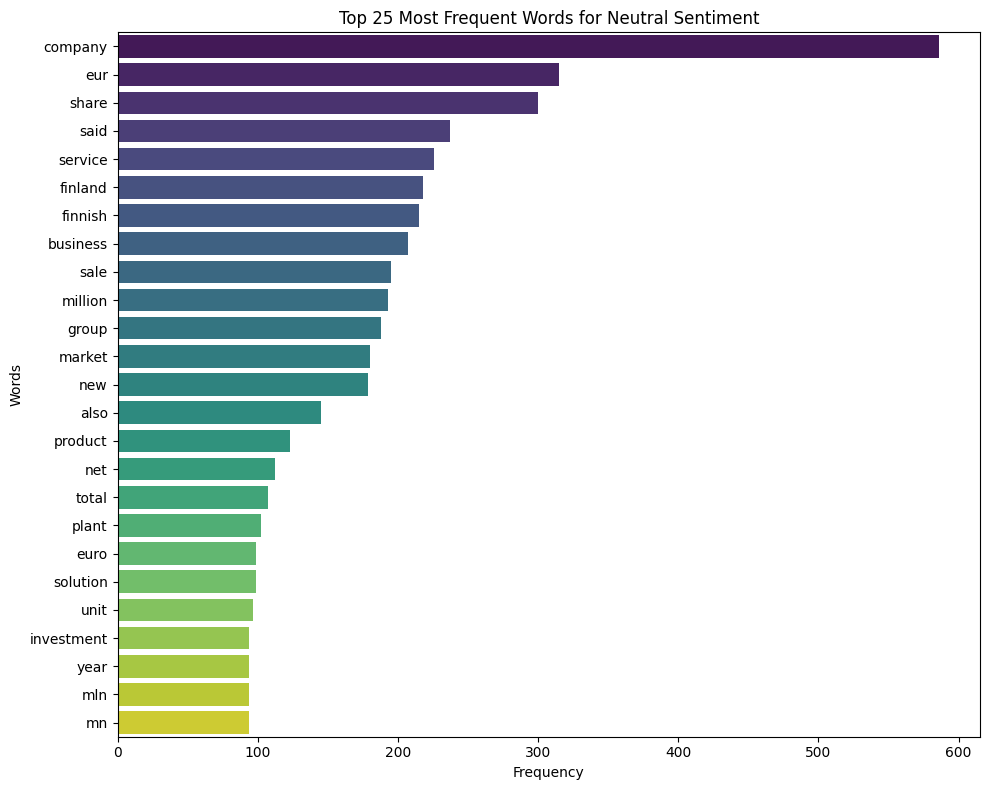

In [185]:
plot_word_frequency_by_sentiment(df, 'neutral', 25)

## **3. Bi-grams Visualization**
This will visualize the most frequent pairs (bigrams)

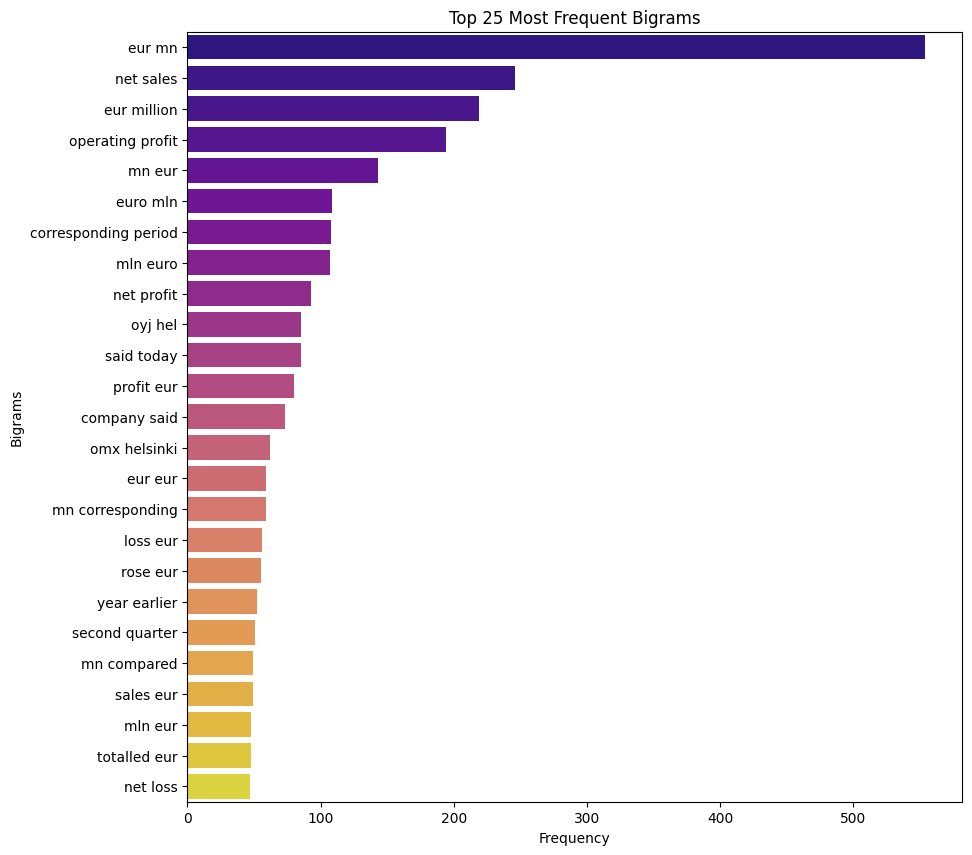

In [186]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def plot_top_ngrams(corpus, ngram_range=(2, 2), num_ngrams=25):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(corpus)
    ngram_counts = X.sum(axis=0).A1
    ngram_names = vectorizer.get_feature_names_out()

    ngrams_df = pd.DataFrame({'ngram': ngram_names, 'count': ngram_counts})
    top_ngrams = ngrams_df.nlargest(num_ngrams, 'count')

    plt.figure(figsize=(10,10))
    sns.barplot(x='count', y='ngram', data=top_ngrams, palette='plasma')
    plt.title(f'Top {num_ngrams} Most Frequent Bigrams')
    plt.xlabel('Frequency')
    plt.ylabel('Bigrams')
    plt.show()

corpus = df['cleaned_text'].tolist()
plot_top_ngrams(corpus, ngram_range=(2, 2))  # Bigrams

### **Observation (Bi-grams)**
1. As we knew eur is the most frequent word, it also have most frequent word pairs
2. mn is associated more with the word eur
3. The frequency of all other pairs are close to eachother and gradually decreased

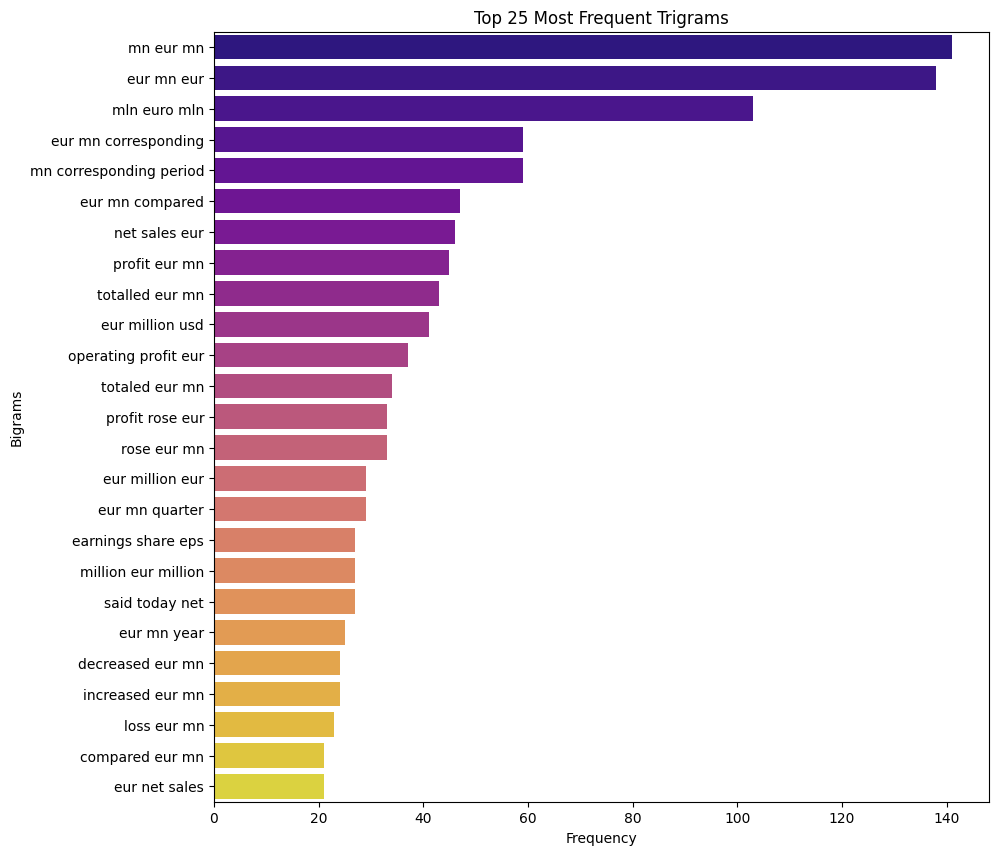

In [187]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def plot_top_ngrams(corpus, ngram_range=(2, 2), num_ngrams=25):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(corpus)
    ngram_counts = X.sum(axis=0).A1
    ngram_names = vectorizer.get_feature_names_out()

    ngrams_df = pd.DataFrame({'ngram': ngram_names, 'count': ngram_counts})
    top_ngrams = ngrams_df.nlargest(num_ngrams, 'count')

    plt.figure(figsize=(10,10))
    sns.barplot(x='count', y='ngram', data=top_ngrams, palette='plasma')
    plt.title(f'Top {num_ngrams} Most Frequent Trigrams')
    plt.xlabel('Frequency')
    plt.ylabel('Bigrams')
    plt.show()

    corpus = df['cleaned_text'].tolist()

plot_top_ngrams(corpus, ngram_range=(3, 3))  # Trigrams

### **Observation (tri-grams)**
1. As we knew eur and mn are the most frequent word pair, they also have most frequent word pair with other words
2. The frequency of all other pairs are close to eachother and gradually decreased

## **Data Pre-Processing**

### **1. TF-IDF (Term Frequency-Inverse Document Frequency)**
TF-IDF scores help identify the importance of words in the dataset

TF (Term Frequency): Measures how frequently a term appears in a document. Formula: TF(t, d) = (Number of times term t appears in document d) / (Total number of terms in document d)

IDF (Inverse Document Frequency): Measures how important a term is across a collection of documents. Formula: IDF(t) = log( (Total number of documents) / (Number of documents containing term t) )

In [188]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

tfidf_matrix = tfidf.fit_transform(df['cleaned_text'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

tfidf_df.head()

,aaland,aalborg,aalto,aaltonen,aaron,aava,aazhang,ab,abb,abbott,...,zinc,zinclead,zip,zloty,zoltan,zone,zoo,zte,zu,zxx
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **2. Bag of Words**
Bag of Words converts text into a matrix of token counts.

Bag-of-words is a way to represent text where you count how often each word appears in a document. It's like putting all the words in a bag and counting them, ignoring the order they were in.

It's more of a process:

Tokenization: Split the text into individual words (tokens).
Vocabulary Creation: Create a list of all unique tokens in the corpus.
Counting: For each document, count the occurrences of each token in the vocabulary.
Representation: Create a vector for each document, where each element represents the count of a specific token.

This process can be expressed as a simple equation for a single document:

This process can be expressed as a simple equation for a single document:

BoW(d) = [count(t1, d), count(t2, d), ..., count(tn, d)]

where:

BoW(d) is the bag-of-words representation of document d
count(ti, d) is the number of times token ti appears in document d
n is the total number of unique tokens in the vocabulary.


In [189]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

bow_matrix = vectorizer.fit_transform(df['cleaned_text'])

bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

bow_df.head()

,aaland,aalborg,aalto,aaltonen,aaron,aava,aazhang,ab,abb,abbott,...,zinc,zinclead,zip,zloty,zoltan,zone,zoo,zte,zu,zxx
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **3. Word2Vec**
Word2Vec represents each word as a vector. You'll need the gensim library for this.

Word2Vec (W2V)

Word2Vec turns words into numbers (vectors) to capture meaning and relationships. Similar words have similar vectors. It's like a smart dictionary.

Types
CBOW: Predicts a word based on its surrounding words (context).

Skip-gram: Predicts surrounding words based on a given word.


In [190]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

# Ensure your DataFrame df with 'tokens' column is defined
# df['tokens'] should contain tokenized text data

# Step 1: Create Word2Vec model
word2vec_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Step 2: Define function to get Word2Vec vectors
def get_word2vec_vector(text):
    word_vectors = [word2vec_model.wv[word] for word in text.split() if word in word2vec_model.wv]

    if len(word_vectors) == 0:
        return np.zeros(word2vec_model.vector_size)  # Use vector_size attribute of model

    return np.mean(word_vectors, axis=0)

# Step 3: Apply the function to each text entry in the DataFrame
word2vec_matrix = np.array([get_word2vec_vector(text) for text in df['cleaned_text']])  # Use 'cleaned_text' if applicable

print(word2vec_matrix.shape)

(4839, 100)


In [191]:
print(word2vec_matrix)

[[-0.10387196  0.2069323   0.08715001 ... -0.18392602 -0.02401664
   0.02258115]
 [-0.10509454  0.20540501  0.09218838 ... -0.17762229 -0.01896064
   0.02522622]
 [-0.14519024  0.29157916  0.12541743 ... -0.26331767 -0.03185469
   0.03304388]
 ...
 [-0.40525195  0.67465997  0.3110727  ... -0.11391333  0.31054214
   0.14128798]
 [-0.38637188  0.64203334  0.29658762 ... -0.10611943  0.28719002
   0.13464715]
 [-0.14264186  0.2911134   0.12526517 ... -0.22641353 -0.00896
   0.03527534]]


### **4.doc2Vec**
Doc2Vec is an extension of Word2Vec that generates vector representations for entire documents or sentences, enabling document-level semantic analysis.

 Doc2Vec (D2V)

Doc2Vec is an extension of Word2Vec that represents entire documents as vectors. This allows you to capture the meaning of larger text units, like sentences or articles.


Distributed Memory (DM): Similar to CBOW, it predicts a target word based on the document and surrounding words.
Distributed Bag of Words (DBOW): Similar to Skip-gram, it predicts words in a document based on the document ID.


In [192]:
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import pandas as pd

# Ensure your DataFrame df with 'tokens' column is defined
# df['tokens'] should contain tokenized text data

# Step 1: Create TaggedDocuments from the 'tokens' column
tagged_data = [TaggedDocument(words=tokens, tags=[str(i)]) for i, tokens in enumerate(df['tokens'])]

# Step 2: Create Doc2Vec model
doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=10)
doc2vec_model.build_vocab(tagged_data)
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

# Step 3: Define function to get Doc2Vec vectors
def get_doc2vec_vector(doc_id):
    return doc2vec_model.dv[str(doc_id)]  # Retrieve the document vector by its tag (which is the document ID)

# Step 4: Apply the function to each document in the DataFrame
doc2vec_matrix = np.array([get_doc2vec_vector(i) for i in range(len(df['tokens']))])

print(doc2vec_matrix.shape)


(4839, 100)


In [193]:
print(doc2vec_matrix)

[[-0.01620889  0.00311361 -0.00926839 ... -0.06730391  0.02179377
   0.01179442]
 [-0.03351104  0.02080703  0.00552031 ... -0.10169666  0.0293815
   0.02574959]
 [ 0.00376851 -0.02131747  0.0021416  ... -0.00634723  0.00168272
  -0.01396133]
 ...
 [-0.01898718  0.02108041  0.01477242 ...  0.03691579  0.02235857
   0.01256931]
 [-0.03888386  0.03101338  0.02021425 ... -0.02132039  0.02475978
   0.01931982]
 [-0.00734855  0.01198112  0.01377656 ... -0.02214294  0.00207579
   0.01487179]]


### **5. GloVe (Global Vectors for Word Representation)**
For GloVe, you can either train your own model or use pre-trained vectors.

GloVe is a way to give each word a unique "code" based on how often it appears near other words in a large amount of text.
These codes help computers understand the meaning and relationships between words.

Two Types of GloVe embeddings, each in 2 lines:

1. Pre-trained GloVe Embeddings:

Pre-trained embeddings are readily available word vectors learned from massive text data like Wikipedia. They offer general-purpose word representations and come in various dimensions (e.g., 50, 100, 200, 300).

2. Custom-trained GloVe Embeddings:

Custom-trained embeddings are created by training the GloVe algorithm on your specific dataset. This allows for capturing domain-specific word relationships and potentially better performance for your task.

In [261]:
glove_file = '/content/glove.6B.100d.txt'
glove_dict = {}

In [262]:
import os
if os.path.exists(glove_file):
    print(f"File found at {glove_file}")
else:
    print(f"File not found at {glove_file}")

File found at /content/glove.6B.100d.txt


In [196]:
import numpy as np
import pandas as pd
#Check if the file exists:
import os

glove_file = '/content/glove.6B.100d.txt'
glove_dict = {}

# Download the GloVe embeddings if the file does not exist in the given path.
if not os.path.exists(glove_file):
    print("GloVe embeddings not found. Downloading...")
    !wget http://nlp.stanford.edu/data/glove.6B.zip
    !unzip glove.6B.zip
    print("Download complete!")
else:
    print("GloVe embeddings found.")


# Load GloVe vectors
with open(glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_dict[word] = vector

# Create GloVe matrix
def get_glove_vector(text):
    words = text.split()
    word_vectors = [glove_dict[word] for word in words if word in glove_dict]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(100)

glove_matrix = np.array([get_glove_vector(text) for text in df['Message']])

GloVe embeddings found.


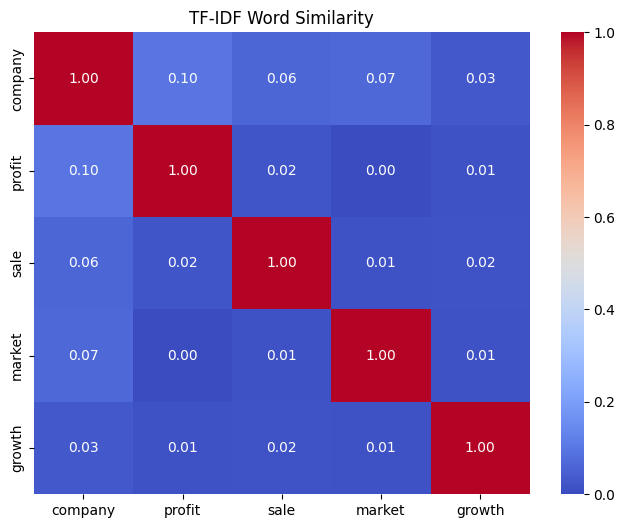

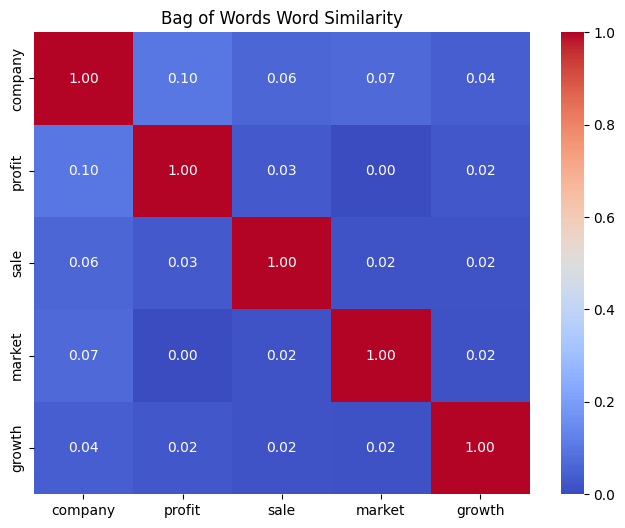

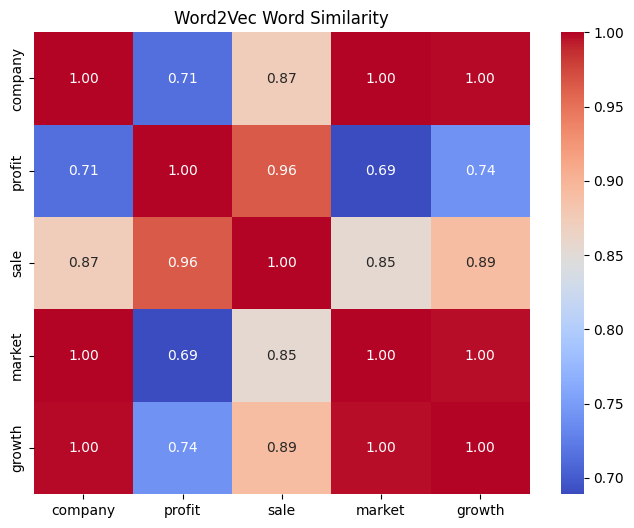

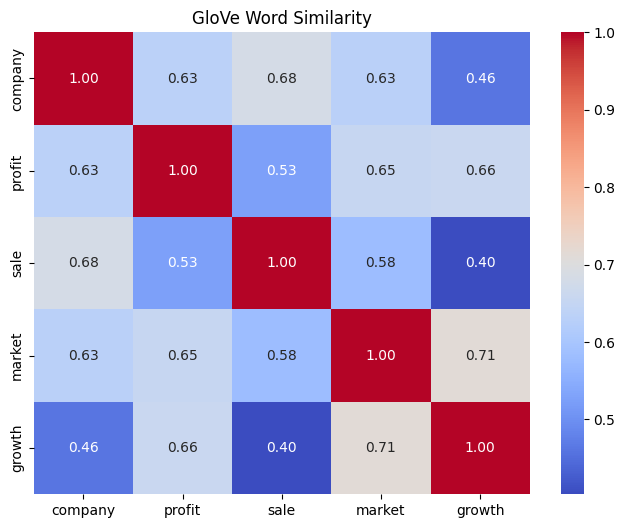

In [197]:
from sklearn.metrics.pairwise import cosine_similarity

# Defining a function to compute and plot a heatmap for a given matrix and title
def plot_similarity_heatmap(matrix, title, words):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, cmap='coolwarm', annot=True, fmt=".2f", xticklabels=words, yticklabels=words)
    plt.title(title)
    plt.show()

# Example set of words for comparison
words = ['company', 'profit', 'sale', 'market', 'growth']

# Function to get vectors or fallback to a zero vector if the word is not found
def get_vector(model, word, fallback_dim=100):
    try:
        return model[word]
    except KeyError:
        # Return a zero vector if the word is not found
        print(f"Word '{word}' not found in vocabulary.")
        return np.zeros(fallback_dim)

### 1. TF-IDF Similarity Matrix
# Check if the words exist in the TF-IDF vocabulary
tfidf_vectors = [tfidf_df[word].values if word in tfidf_df.columns else np.zeros(tfidf_df.shape[1]) for word in words]

# Compute cosine similarity matrix
tfidf_similarity = cosine_similarity(tfidf_vectors)

# Plot heatmap for TF-IDF
plot_similarity_heatmap(tfidf_similarity, 'TF-IDF Word Similarity', words)

### 2. Bag of Words (BoW) Similarity Matrix
# Check if the words exist in the BoW vocabulary
bow_vectors = [bow_df[word].values if word in bow_df.columns else np.zeros(bow_df.shape[1]) for word in words]

# Compute cosine similarity matrix
bow_similarity = cosine_similarity(bow_vectors)

# Plot heatmap for Bag of Words
plot_similarity_heatmap(bow_similarity, 'Bag of Words Word Similarity', words)

### 3. Word2Vec Similarity Matrix
# Get Word2Vec vectors or fallback to zero vector for missing words
word2vec_vectors = [get_vector(word2vec_model.wv, word) for word in words]

# Compute cosine similarity matrix
word2vec_similarity = cosine_similarity(word2vec_vectors)

# Plot heatmap for Word2Vec
plot_similarity_heatmap(word2vec_similarity, 'Word2Vec Word Similarity', words)

### 4. GloVe Similarity Matrix
# Get GloVe vectors or fallback to zero vector for missing words
glove_vectors = [get_vector(glove_dict, word) for word in words]

# Compute cosine similarity matrix
glove_similarity = cosine_similarity(glove_vectors)

# Plot heatmap for GloVe
plot_similarity_heatmap(glove_similarity, 'GloVe Word Similarity', words)


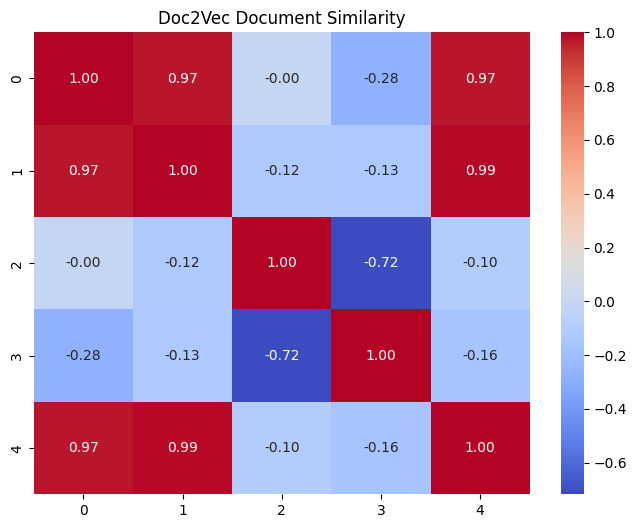

In [198]:
# Example set of document indices for comparison (you should use document indices, not words)
doc_ids = [0, 1, 2, 3, 4]  # Replace with valid document indices in your data

# Get Doc2Vec vectors for the given document IDs
doc2vec_vectors = [doc2vec_model.dv[i] for i in doc_ids]  # Retrieve document vectors by their ID

# Compute cosine similarity matrix for documents
doc2vec_similarity = cosine_similarity(doc2vec_vectors)

# Plot heatmap for Doc2Vec document similarity
plot_similarity_heatmap(doc2vec_similarity, 'Doc2Vec Document Similarity', doc_ids)


### **Observation**
Word2Vec (W2V): Shows high cosine similarity scores, effectively capturing semantic relationships among words.

Doc2Vec (D2V): Provides document-level embeddings with less granularity in word relationships, suitable for document-based tasks.

GloVe: Reflects strong global co-occurrence understanding but may show slightly lower similarity for closely related words compared to W2V.

# **Applying Machine Learning Models**

### **1. Applying Logistic Regression**

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Convert sentiment to numeric labels (positive -> 1, neutral -> 0, negative -> -1)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else (0 if x == 'neutral' else -1))

# Assuming 'vector' contains the document vectors (from global variables)
df['doc2vec'] = list(doc2vec_model.dv.vectors)  # Add a new column 'doc2vec' to the DataFrame

# Features and labels
X = list(df['doc2vec'])  # Use the new 'doc2vec' column for features
y = df['sentiment_label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [200]:
# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.6012396694214877


In [201]:
# Accuracy on the training set
train_accuracy = log_reg.score(X_train, y_train)

# Accuracy on the test set
test_accuracy = log_reg.score(X_test, y_test)

print(f"Training Accuracy for Logistic Regression: {train_accuracy}")
print(f"Test Accuracy fro Logistic Regression: {test_accuracy}")

Training Accuracy for Logistic Regression: 0.6114699044174632
Test Accuracy fro Logistic Regression: 0.6012396694214877


In [202]:
import numpy as np

# Function to preprocess and convert a sentence to Word2Vec representation
def preprocess_and_convert_to_word2vec(sentence, word2vec_model):
    # Step 1: Remove special characters and keep only alphanumeric and spaces
    sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)

    # Step 2: Convert to lowercase
    sentence = sentence.lower()

    # Step 3: Tokenize the sentence
    tokens = sentence.split()  # Simple tokenization by splitting on spaces

    # Step 4: Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Step 5: Apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Step 6: Convert tokens to Word2Vec vectors
    word_vectors = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]

    # Step 7: If no known words are found, return a zero vector
    if len(word_vectors) == 0:
        return np.zeros(word2vec_model.vector_size)

    # Step 8: Take the mean of the word vectors to represent the sentence
    word2vec_vector = np.mean(word_vectors, axis=0)

    return word2vec_vector

# Example input sentence
new_sentence = "The company's profits have skyrocketed this quarter, and employees are thrilled with the new opportunities for growth and innovation"

# Convert the new sentence to Word2Vec vector
new_sentence_vector = preprocess_and_convert_to_word2vec(new_sentence, word2vec_model)  # Assuming word2vec_model exists

# Reshape the vector to fit the model's expected input shape
new_sentence_vector = new_sentence_vector.reshape(1, -1)

# Predict sentiment using the trained logistic regression model
predicted_sentiment = log_reg.predict(new_sentence_vector)

# Print the predicted sentiment (1 for positive, 0 for neutral, -1 for negative)
print(f"Predicted Sentiment for the new sentence: {predicted_sentiment[0]}")

Predicted Sentiment for the new sentence: -1


### **Validation using Logistic Regression**

In [203]:
import numpy as np

def get_avg_word2vec(tokens, word2vec_model, vector_size):
    """
    Calculate the average Word2Vec vector for a list of tokens.

    Args:
        tokens (list): A list of tokens (words).
        word2vec_model (gensim.models.Word2Vec): The trained Word2Vec model.
        vector_size (int): The size of the Word2Vec vectors.

    Returns:
        numpy.ndarray: The average Word2Vec vector for the tokens.
    """
    word_vectors = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]

    if len(word_vectors) == 0:
        return np.zeros(vector_size)

    return np.mean(word_vectors, axis=0)

#validation 1
new_sentence = "The local electronics industry is amid layoff concerns and last year has laid off tens of employees"
new_sentence_tokens = new_sentence.split()

new_sentence_vector = get_avg_word2vec(new_sentence_tokens, word2vec_model, 100)

new_sentence_vector = np.array(new_sentence_vector).reshape(1, -1)

predicted_sentiment = log_reg.predict(new_sentence_vector)

print(f"Predicted Sentiment for the new sentence: {predicted_sentiment[0]}")

Predicted Sentiment for the new sentence: -1


In [204]:
#validation 2
new_sentence = "Congratulations! you have won a $1,000 Walmart gift card."
new_sentence_tokens = new_sentence.split()

new_sentence_vector = get_avg_word2vec(new_sentence_tokens, word2vec_model, 100)

new_sentence_vector = np.array(new_sentence_vector).reshape(1, -1)

predicted_sentiment = log_reg.predict(new_sentence_vector)

print(f"Predicted Sentiment for the new sentence: {predicted_sentiment[0]}")

Predicted Sentiment for the new sentence: 0


In [205]:
#validation 3
new_sentence = "The project faced multiple delays and ended in failure."
new_sentence_tokens = new_sentence.split()

new_sentence_vector = get_avg_word2vec(new_sentence_tokens, word2vec_model, 100)

new_sentence_vector = np.array(new_sentence_vector).reshape(1, -1)

predicted_sentiment = log_reg.predict(new_sentence_vector)

print(f"Predicted Sentiment for the new sentence: {predicted_sentiment[0]}")

Predicted Sentiment for the new sentence: 1


In [206]:
#validation 4
new_sentence = "The meeting is scheduled for next Tuesday at 10 AM."
new_sentence_tokens = new_sentence.split()

new_sentence_vector = get_avg_word2vec(new_sentence_tokens, word2vec_model, 100)

new_sentence_vector = np.array(new_sentence_vector).reshape(1, -1)

predicted_sentiment = log_reg.predict(new_sentence_vector)

print(f"Predicted Sentiment for the new sentence: {predicted_sentiment[0]}")

Predicted Sentiment for the new sentence: 1


### **2. Applying SVM Classifier**

In [207]:
from sklearn.svm import SVC

# Initialize the model
svm_classifier = SVC(random_state=42)

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions on both training and test data
y_train_pred_svm = svm_classifier.predict(X_train)
y_test_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy for training and test sets
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print("SVM Classifier:")
print("")
print(f"SVM Training Accuracy: {train_accuracy_svm}")
print(f"SVM Test Accuracy: {test_accuracy_svm}")

SVM Classifier:

SVM Training Accuracy: 0.6179281839318006
SVM Test Accuracy: 0.6084710743801653


### **Validation using SVM Classifier**

In [208]:
#validation 1
new_sentence = "The local electronics industry is amid layoff concerns and last year has laid off tens of employees"
new_sentence_tokens = new_sentence.split()

new_sentence_vector = get_avg_word2vec(new_sentence_tokens, word2vec_model, 100)

new_sentence_vector = np.array(new_sentence_vector).reshape(1, -1)

predicted_sentiment = svm_classifier.predict(new_sentence_vector)

print(f"Predicted Sentiment for the new sentence: {predicted_sentiment[0]}")

Predicted Sentiment for the new sentence: 0


In [209]:
#validation 2
new_sentence = "Congratulations! you have won a $1,000 Walmart gift card."
new_sentence_tokens = new_sentence.split()

new_sentence_vector = get_avg_word2vec(new_sentence_tokens, word2vec_model, 100)

new_sentence_vector = np.array(new_sentence_vector).reshape(1, -1)

predicted_sentiment = svm_classifier.predict(new_sentence_vector)

print(f"Predicted Sentiment for the new sentence: {predicted_sentiment[0]}")

Predicted Sentiment for the new sentence: 0


In [210]:
#validation 3
new_sentence = "The project faced multiple delays and ended in failure."
new_sentence_tokens = new_sentence.split()

new_sentence_vector = get_avg_word2vec(new_sentence_tokens, word2vec_model, 100)

new_sentence_vector = np.array(new_sentence_vector).reshape(1, -1)

predicted_sentiment = svm_classifier.predict(new_sentence_vector)

print(f"Predicted Sentiment for the new sentence: {predicted_sentiment[0]}")

Predicted Sentiment for the new sentence: 0


In [211]:
#validation 4
new_sentence = "The meeting is scheduled for next Tuesday at 10 AM."
new_sentence_tokens = new_sentence.split()

new_sentence_vector = get_avg_word2vec(new_sentence_tokens, word2vec_model, 100)

new_sentence_vector = np.array(new_sentence_vector).reshape(1, -1)

predicted_sentiment = svm_classifier.predict(new_sentence_vector)

print(f"Predicted Sentiment for the new sentence: {predicted_sentiment[0]}")

Predicted Sentiment for the new sentence: 0


***

### **Observation**
***
**Logistic Regression:** Demonstrated effectiveness in binary classification, offering clear interpretability and performing reasonably well in distinguishing between sentiment categories.

**Support Vector Classifier (SVC):**Outperformed other models with its ability to find optimal hyperplanes, providing robust performance in separating positive, negative, and neutral sentiments.

While Logistic Regression and SVC  provided reasonable performance, they were not significantly better in accurately predicting positive, negative, and neutral sentiments.

**LSTM (Long Short-Term Memory):** Preferred for its ability to capture long-term dependencies and context in sequential data, offering improved accuracy in sentiment classification tasks.

### **3. Applying LSTM**

In [212]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [213]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec # Doc Vector model
from sklearn import utils # It helps to generate the charts
from sklearn.model_selection import train_test_split # To split the data
from tensorflow.keras.preprocessing.sequence import pad_sequences
import gensim # to represant the data in vectors
from sklearn.linear_model import LogisticRegression # Logistic regression
from gensim.models.doc2vec import TaggedDocument


In [214]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [215]:
sentiment  = {'positive': 0,'neutral': 1,'negative':2}

df.sentiment = [sentiment[item] for item in df.sentiment]
#print(df)

In [216]:
import re
from bs4 import BeautifulSoup # it helps to clean the sentence
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text)
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['Message'] = df['Message'].apply(cleanText)

In [217]:
df['Message'] = df['Message'].apply(cleanText)
train, test = train_test_split(df, test_size=0.000001 , random_state=42)
import nltk # natural language tool kit helps to tocanised the data
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            #if len(word) < 0:
            if len(word) <= 0:
                continue
            tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[r.sentiment]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[r.sentiment]), axis=1)

# The maximum number of words to be used. (most frequent)
max_fatures = 500000

# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50

#tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer = Tokenizer(num_words=max_fatures, split=' ', filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Message'].values)
X = tokenizer.texts_to_sequences(df['Message'].values)
X = pad_sequences(X)
print('Found %s unique tokens.' % len(X))

Found 4839 unique tokens.


In [218]:
import pickle

# Save the tokenizer
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [219]:
# make tose words in numirical dots
X = tokenizer.texts_to_sequences(df['Message'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (4839, 50)


In [220]:
train_tagged.values

array([TaggedDocument(words=['on', 'dec.', '1', ',', 'grimaldi', 'acquired', '1.5', 'million', 'shares', 'and', 'a', '50.1-percent', 'stake', 'in', 'finnlines', '.'], tags=[1]),
       TaggedDocument(words=['the', 'etracted', 'filtrates', 'are', 'very', 'high', 'in', 'clarity', 'while', 'the', 'dried', 'filter', 'cakes', 'meet', 'required', 'transport', 'moisture', 'limits', '(', 'tmls', ')', 'for', 'their', 'ore', 'grades', '.'], tags=[1]),
       TaggedDocument(words=['the', 'use', 'case', 'dramatically', 'narrows', 'if', 'you', 'go', 'only', 'with', 'the', 'hot', 's', 'ltd', '.'], tags=[1]),
       ...,
       TaggedDocument(words=['purchase', 'it', 'for', 'the', '12mp', 'snapper', ',', 'if', 'nothing', 'else', '.'], tags=[1]),
       TaggedDocument(words=['the', 'changes', 'in', 'readership', 'were', 'not', 'significant', '.'], tags=[1]),
       TaggedDocument(words=['(', 'adp', 'news', ')', '-', 'oct', '31', ',', '2008', '-', 'finnish', 'food', 'company', 'raisio', 'oyj', '(', 'om

In [221]:
d2v_model = Doc2Vec(dm=1,vector_size=20, dm_mean=1, window=8, min_count=1, workers=1, alpha=0.065, min_alpha=0.065,epochs=5)
d2v_model.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 4838/4838 [00:00<00:00, 2010905.04it/s]


In [222]:
for epoch in range(30):
    d2v_model.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    d2v_model.alpha -= 0.002
    d2v_model.min_alpha = d2v_model.alpha

100%|██████████| 4838/4838 [00:00<00:00, 1215820.42it/s]


In [223]:
print(d2v_model)

Doc2Vec<dm/m,d20,n5,w8,s0.001>


In [224]:
len(d2v_model.wv)

11680

In [225]:
embedding_matrix = np.zeros((len(d2v_model.wv)+ 1, 20))
for i, vec in enumerate(d2v_model.docvecs.vectors):
    while i in vec <= 1000:

          embedding_matrix[i]=vec

In [226]:
d2v_model.wv.most_similar(positive=['profit'], topn=10)

[('loss', 0.8909379243850708),
 ('income', 0.7989950180053711),
 ('profits', 0.7775663137435913),
 ('sales', 0.7504886984825134),
 ('eur193', 0.7294902205467224),
 ('bill', 0.7107166051864624),
 ('eur121m', 0.7008311152458191),
 ('.27', 0.6906806826591492),
 ('91.6', 0.6836118102073669),
 ('turnover', 0.6830601692199707)]

In [227]:
d2v_model.wv.most_similar(negative=['profit'], topn=10)

[('bilfinger', 0.665962278842926),
 ('cheered', 0.6293668746948242),
 ('redevelopment', 0.6278780102729797),
 ('crucially', 0.614399254322052),
 ('winders', 0.6101697683334351),
 ('kaupunki', 0.6078861355781555),
 ('refinancing', 0.5870019197463989),
 ('pushing', 0.5765472650527954),
 ('scrapped', 0.5764943361282349),
 ('cruise', 0.5624498128890991)]

In [228]:
# Top 10 with investment word
d2v_model.wv.most_similar(positive=['investment'], topn=10)

[('organization', 0.7025506496429443),
 ('aho', 0.7022331357002258),
 ('80mn', 0.7020543813705444),
 ('fair', 0.6869555711746216),
 ('95.3', 0.6832523941993713),
 ('buyer', 0.6811538934707642),
 ('premature', 0.6806503534317017),
 ('chs', 0.6795864105224609),
 ('tampere', 0.6746875643730164),
 ('properties', 0.6732292175292969)]

In [229]:
# Top 10 with broke word
d2v_model.wv.most_similar(positive=['broke'], topn=10)

[('mold', 0.9682948589324951),
 ('aptly', 0.8681876063346863),
 ('elaborated', 0.8503767848014832),
 ('kids', 0.8479986190795898),
 ('peterson', 0.8471434712409973),
 ('bakosch', 0.8402964472770691),
 ('my', 0.8256639838218689),
 ('warmly', 0.8208724856376648),
 ('meaning', 0.8178696036338806),
 ('euro172', 0.8146263957023621)]

In [230]:
#Plot Similarity word in Doc2vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [231]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Input

# Initialize model
model = Sequential()

# Input layer to define the shape of the input data
model.add(Input(shape=(50,)))  # Assuming input length is 50

# Embed word vectors (input_length is defined here)
model.add(Embedding(input_dim=len(d2v_model.wv) + 1, output_dim=20, weights=[embedding_matrix], trainable=True))

# LSTM layer
model.add(LSTM(50, return_sequences=False))

# Dense layer with softmax for multi-class classification
model.add(Dense(3, activation="softmax"))

# Model summary
model.summary()

# Compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 50, 20)              │         233,620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          14,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 247,973 (968.64 KB)

 Trainable params: 247,973 (968.64 KB)

 Non-trainable params: 0 (0.00 B)

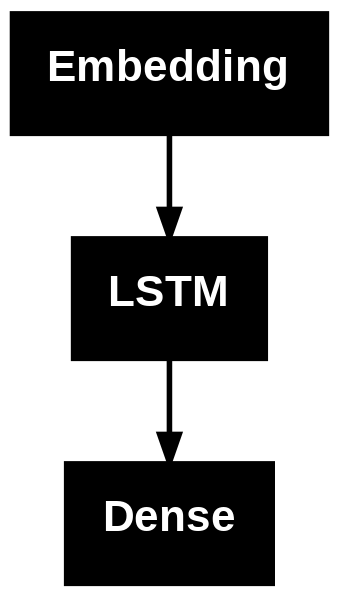

In [232]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

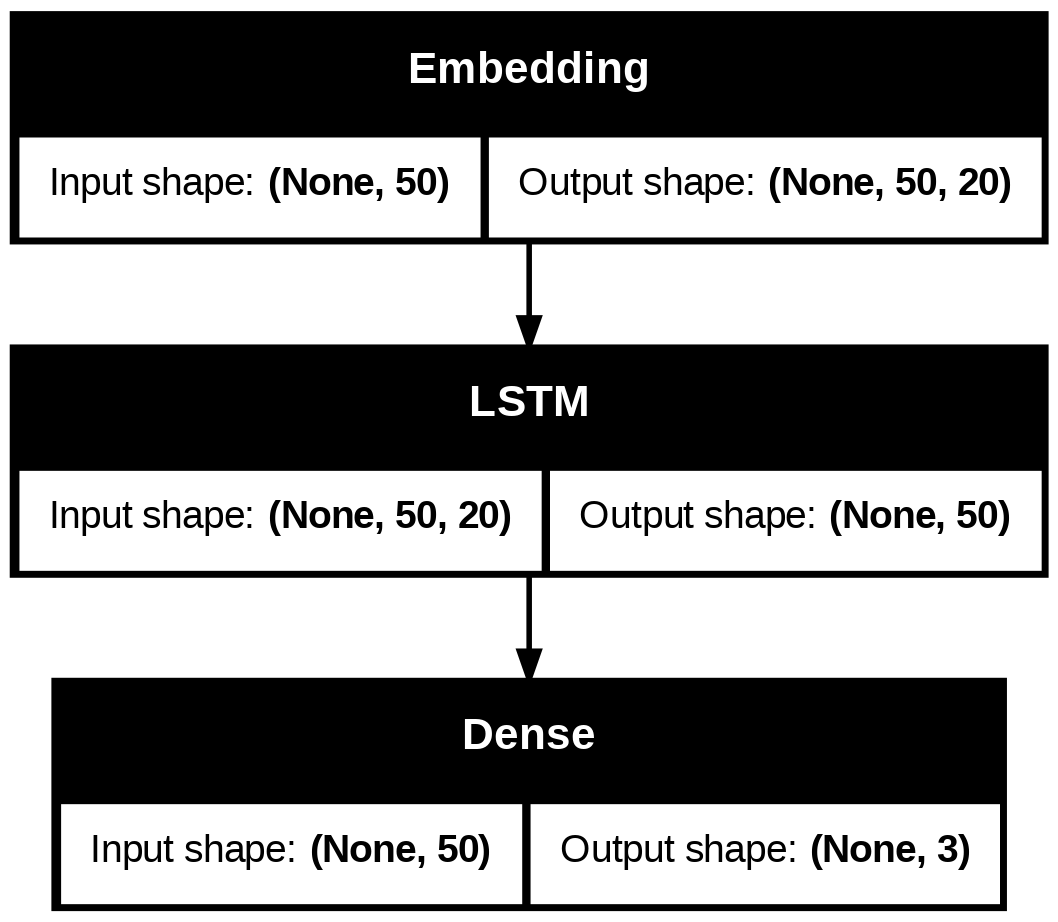

In [236]:
from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True)

In [237]:

# to Train the model split the datapoints
Y = pd.get_dummies(df['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4113, 50) (4113, 3)
(726, 50) (726, 3)


In [241]:
batch_size = 32  # Define batch size

# Train the model with KeyboardInterrupt handling
try:
    history = model.fit(
        X_train,
        Y_train,
        epochs=50,  # Number of training epochs
        batch_size=batch_size,  # Size of each batch
        verbose=2  # Print training progress (2 for epoch-level details)
    )
except KeyboardInterrupt:
    print("Training interrupted by user.")
finally:
    # Print a summary of the training history (optional)
    if 'history' in locals():  # Check if history was created
        print(history.history)

Epoch 1/50
129/129 - 4s - 34ms/step - accuracy: 0.9961 - loss: 0.0147
Epoch 2/50
129/129 - 5s - 41ms/step - accuracy: 0.9976 - loss: 0.0099
Epoch 3/50
129/129 - 5s - 41ms/step - accuracy: 0.9949 - loss: 0.0170
Epoch 4/50
129/129 - 8s - 59ms/step - accuracy: 0.9944 - loss: 0.0195
Epoch 5/50
129/129 - 7s - 55ms/step - accuracy: 0.9985 - loss: 0.0089
Epoch 6/50
129/129 - 6s - 45ms/step - accuracy: 0.9990 - loss: 0.0044
Epoch 7/50
129/129 - 6s - 45ms/step - accuracy: 0.9993 - loss: 0.0031
Epoch 8/50
129/129 - 8s - 59ms/step - accuracy: 0.9990 - loss: 0.0032
Epoch 9/50
129/129 - 5s - 35ms/step - accuracy: 0.9993 - loss: 0.0030
Epoch 10/50
129/129 - 3s - 20ms/step - accuracy: 0.9993 - loss: 0.0028
Epoch 11/50
129/129 - 8s - 59ms/step - accuracy: 0.9993 - loss: 0.0025
Epoch 12/50
129/129 - 5s - 39ms/step - accuracy: 0.9993 - loss: 0.0022
Epoch 13/50
129/129 - 3s - 22ms/step - accuracy: 0.9995 - loss: 0.0021
Epoch 14/50
129/129 - 5s - 40ms/step - accuracy: 0.9993 - loss: 0.0021
Epoch 15/50
129

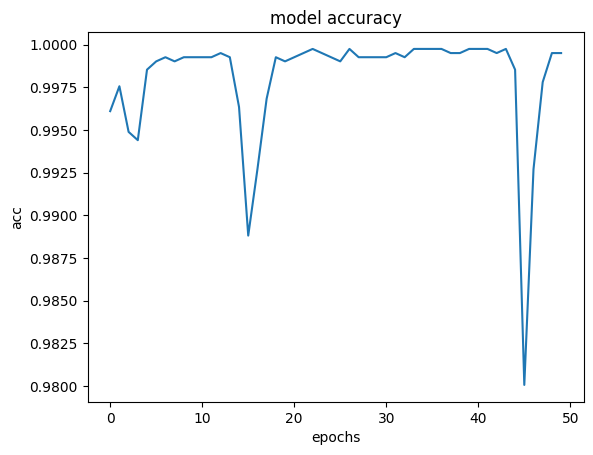

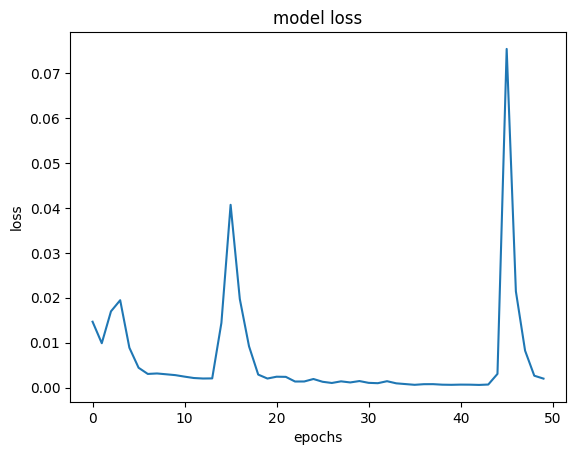

<Figure size 640x480 with 0 Axes>

In [242]:
4# Plot the results (Accurecy and loss)

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

In [243]:
# evaluate the model
_, train_acc = model.evaluate(X_train, Y_train, verbose=2)
_, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('Train: %.3f, Test: %.4f' % (train_acc, test_acc))

129/129 - 3s - 20ms/step - accuracy: 0.9993 - loss: 0.0015
23/23 - 0s - 16ms/step - accuracy: 0.7218 - loss: 1.9280
Train: 0.999, Test: 0.7218


In [244]:
# Predict probabilities for the test set
yhat_probs = model.predict(X_test, verbose=0)
print(yhat_probs)

# Predict the class with the highest probability for each sample
yhat_classes = np.argmax(yhat_probs, axis=1)
print(yhat_classes)


[[6.73019804e-06 9.99981821e-01 1.14257000e-05]
 [2.38330222e-06 9.99994099e-01 3.44021282e-06]
 [5.90259675e-04 9.99293566e-01 1.16235235e-04]
 ...
 [9.91475701e-01 7.25767948e-03 1.26663060e-03]
 [8.74190032e-01 1.23689927e-01 2.11993139e-03]
 [1.16262898e-04 9.99533296e-01 3.50472343e-04]]
[1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 2 1 1 0 1 1 1 1 1 1 0 1 0 1
 1 1 1 0 2 0 1 0 1 1 2 0 1 1 1 0 1 1 0 0 2 0 0 0 1 2 0 1 1 2 1 0 1 2 0 1 1
 0 1 1 1 1 2 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 2 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 2 2 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1
 1 0 0 0 1 1 2 1 1 0 2 1 1 1 1 1 2 0 1 1 0 1 1 0 0 1 1 2 0 0 0 0 1 0 1 1 2
 2 1 1 1 1 1 2 0 2 1 0 0 2 1 1 0 0 0 1 1 0 1 0 1 0 1 1 2 1 1 0 1 2 0 1 1 1
 1 1 1 1 1 0 0 1 1 1 2 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 2 0 1 1 0 2
 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 2 1 1 1 0 1 1 2 1 1 1 1 0 1 1 0 2 0 2 1
 0 0 0 0 0 2 1 1 1 1 0 0 0 0 1 2 2 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 2 2 1 1 1 1 1 1 1 0 1 1 0 1 

In [245]:
import numpy as np
rounded_labels=np.argmax(Y_test, axis=1)
rounded_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2,
       0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 2, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 2, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1,
       2, 1, 1, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2,
       1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1,
       1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 0, 2, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0,
       2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0,

In [246]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, yhat_classes)
cm

array([[128,  85,   9],
       [ 59, 348,  10],
       [ 14,  25,  48]])

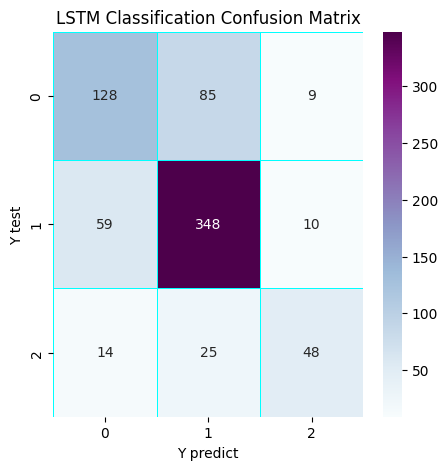

In [247]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

lstm_val = confusion_matrix(rounded_labels, yhat_classes)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lstm_val, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('LSTM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [248]:
# Validation
validation_size = 610

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 1, batch_size = batch_size)

print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7563 - loss: 1.6581
score: 1.75
acc: 0.75


In [249]:
# Save the LSTM model
model.save('lstm_sentiment_model.h5')

In [250]:
# Validation 1
message = ['Congratulations! you have won a $1,000 Walmart gift card']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[[0.9841967  0.01221937 0.00358393]] 0


In [251]:
# Validation 2
message = ['such massive asteroid hit will certainly create new business opportunities']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
[[9.9946648e-01 3.4045916e-05 4.9944164e-04]] 0


In [252]:
# Validation 3
message = ['so does anyone else not open Snapchat anymore ? or is it just me ... ugh this so sad.']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
[[5.4509201e-06 9.9998856e-01 5.9735530e-06]] 1


In [253]:
# Validation 4
message = ['@elonmusk had a terrible experience with a very pushy sales guy from tesla Stanford shop while shopping for model x']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
[[9.9617058e-01 2.9616118e-03 8.6789764e-04]] 0


In [254]:
# Validation 5
message = ['The local electronics industry is expected to remain stable amid layoff concerns surrounding Japanese electronics giants operating in the country, an official says.']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[6.9576417e-05 9.9987876e-01 5.1632611e-05]] 1


In [255]:
# Validation 6
message = ['The local electronics industry is amid layoff concerns and last year has laid off tens of employees']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[1.1161160e-05 4.8078846e-07 9.9998832e-01]] 2


In [256]:
#Validation 7
message = ["The company's profits have skyrocketed this quarter, and employees are thrilled with the new opportunities for growth and innovation."]
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[9.9674428e-01 3.1092816e-03 1.4633163e-04]] 0


In [257]:
#Validation 8
message = ["its looking too bad"]
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.10621949 0.07008976 0.8236907 ]] 2


In [258]:
#Validation 9
message = ["The product quality is very poor, and I am extremely disappointed with my purchase."]
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[1.8027409e-05 9.9997437e-01 7.5784560e-06]] 1


In [259]:
#Validation 10
message = ["The meeting is scheduled for next Tuesday at 10 AM."]
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
[[8.7631561e-06 9.9997354e-01 1.7661052e-05]] 1


In [260]:
#Validation 11
message = ["The project faced multiple delays and ended in failure."]
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[5.2475457e-06 9.9998581e-01 8.9964306e-06]] 1


In [ ]:
from flask import Flask
import time

# Use a string for the application's name
app = Flask(__name__)

@app.route('/')
def hello_world():
    # Introduce a delay of 5 seconds
    time.sleep(5)
    return 'Hello, World!'

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
from flask import Flask, request, render_template

app = Flask(__name__)

@app.route('/', methods=['GET', 'POST'])
def index():
    """Handles GET and POST requests to the root URL."""
    prediction = None  # Initialize prediction variable

    if request.method == 'POST':
        # Get the message from the form data
        message = request.form.get('message')

        # Process the message using your existing code
        seq = tokenizer.texts_to_sequences([message])
        padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)
        pred = model.predict(padded)
        labels = ['0', '1', '2']
        prediction = labels[np.argmax(pred)]  # Store the prediction

    # Render the template with the prediction
    return render_template('index.html', prediction=prediction)

if __name__ == '__main__':
    app.run(debug=True)

In [ ]:
<!DOCTYPE html>
<html>
<head>
    <title>Sentiment Analysis</title>
</head>
<body>
    <h1>Sentiment Analysis</h1>
    <form method="POST">
        <textarea name="message" placeholder="Enter your message"></textarea>
        <br>
        <input type="submit" value="Analyze">
    </form>

    {% if prediction %}
        <h2>Prediction: {{ prediction }}</h2>
    {% endif %}
</body>
</html>